In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import os
os.makedirs("data", exist_ok=True)

In [3]:
import sys, os, shutil

!{sys.executable} -m pip install --user kaggle

print("kaggle path:", shutil.which("kaggle"))
print("PATH:", os.environ["PATH"])

Looking in links: /usr/share/pip-wheels
kaggle path: None
PATH: /opt/conda/envs/anaconda-2024.02-py310/bin:/opt/conda/condabin:/usr/local/julia-1.6.1/bin:/usr/lib/postgresql/12/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


In [4]:
import os
os.environ["PATH"] += ":/home/61d6cf61-7a12-4623-997a-201cddda78c6/.local/bin"

In [5]:
!kaggle --version

Kaggle API 1.7.4.5


In [6]:
!kaggle datasets download -d chidirolex/weightheight-and-breastfeeding-pattern-of-infants -p data/ --unzip
!kaggle datasets download -d jackwin07/celiac-disease-coeliac-disease -p data/ --unzip

Dataset URL: https://www.kaggle.com/datasets/chidirolex/weightheight-and-breastfeeding-pattern-of-infants
License(s): unknown
  0%|                                               | 0.00/24.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 24.6k/24.6k [00:00<00:00, 2.13MB/s]
Dataset URL: https://www.kaggle.com/datasets/jackwin07/celiac-disease-coeliac-disease
License(s): unknown
  0%|                                               | 0.00/10.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 10.2k/10.2k [00:00<00:00, 1.08MB/s]


In [7]:
import os
print(os.listdir("data"))

['Weights heights of Infants with respect to method of feeding.xlsx', 'celiac_disease_lab_data.csv']


In [8]:
import pandas as pd

# Infant feeding & growth (Excel from Kaggle)
infant_df = pd.read_excel(
    "data/Weights heights of Infants with respect to method of feeding.xlsx")

# Celiac disease lab data (CSV from Kaggle)
celiac_df = pd.read_csv(
    "data/celiac_disease_lab_data.csv")

print("Infant shape:", infant_df.shape)
print("Celiac shape:", celiac_df.shape)

Infant shape: (720, 5)
Celiac shape: (2206, 15)


In [9]:
import pandas as pd

infant_df = pd.read_excel("data/Weights heights of Infants with respect to method of feeding.xlsx")
celiac_df = pd.read_csv("data/celiac_disease_lab_data.csv")

In [10]:
import pandas as pd

mpox_df = pd.read_csv("Monkeypox_Research_Summary_Data.csv")

In [11]:
print("Mpox shape:", mpox_df.shape)
print(mpox_df.columns)

Mpox shape: (71, 10)
Index(['Research Activity',
       'Project Title \n(and link to additional information, if available)',
       'Topic', 'Agency and Office Name',
       'Country(ies) in which research is/will be conducted', 'Status',
       'Upcoming Milestones', 'Anticipated Completion', 'Brief Description',
       'Project Link'],
      dtype='object')


In [12]:
print(celiac_df.columns.tolist())

['Age', 'Gender', 'Diabetes', 'Diabetes Type', 'Diarrhoea', 'Abdominal', 'Short_Stature', 'Sticky_Stool', 'Weight_loss', 'IgA', 'IgG', 'IgM', 'Marsh', 'cd_type', 'Disease_Diagnose']


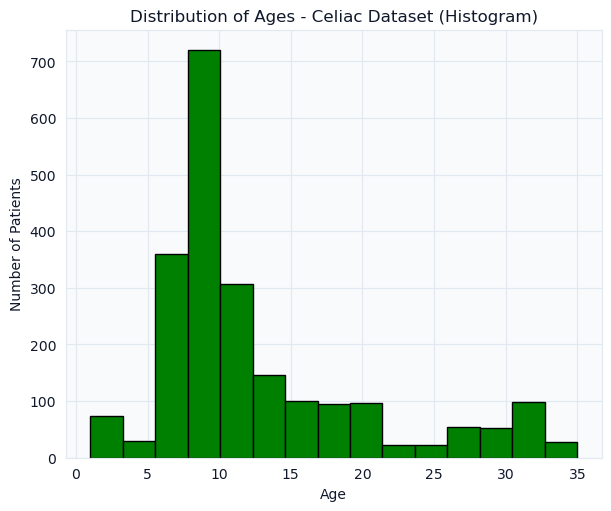

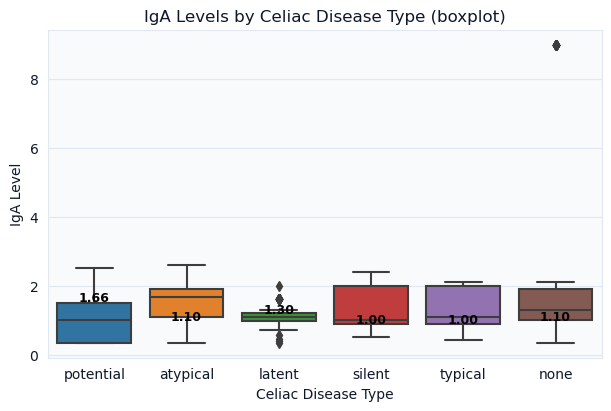

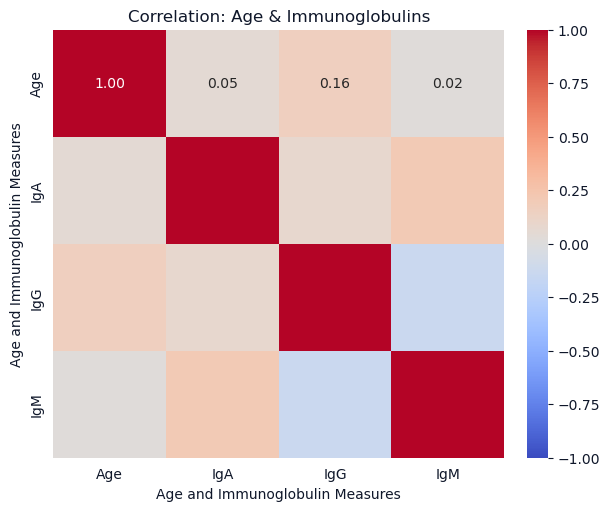

In [76]:
# Celiac dataset: histogram + boxplot + heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.constrained_layout.use"] = True

sns.set_style("whitegrid")
plt.rcParams.update({"figure.facecolor": "#ffffff",
                     "axes.facecolor": "#f8fafc",
                     "axes.edgecolor": "#e2e8f0",
                     "grid.color": "#e2e8f0",
                     "text.color": "#0f172a",
                     "axes.labelcolor": "#0f172a",
                     "xtick.color": "#0f172a",
                     "ytick.color": "#0f172a",})

# ---- ensure numeric columns for correlations ----
for col in ["Age", "IgA", "IgG", "IgM"]:
    celiac_df[col] = pd.to_numeric(celiac_df[col], errors="coerce")

# -------------------------------------------------
# Histogram of Age
# -------------------------------------------------
plt.figure(figsize=(6, 5))
celiac_df["Age"].hist(bins=15, color="green", edgecolor="black")
plt.title("Distribution of Ages - Celiac Dataset (Histogram)")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.savefig("celiac_age_histogram.png", dpi=150)
plt.show()

# -------------------------------------------------
# Boxplot of immunoglobulins by cd_type
# -------------------------------------------------
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=celiac_df, x="cd_type", y="IgA")
medians = celiac_df.groupby("cd_type")["IgA"].median()
for i, (group, median) in enumerate(medians.items()):
    ax.text(i, median, f"{median:.2f}",
            ha="center", va="center", fontsize=9,
            color="black", fontweight="bold")
plt.title("IgA Levels by Celiac Disease Type (boxplot)")
plt.xlabel("Celiac Disease Type")
plt.ylabel("IgA Level")
plt.show()

# -------------------------------------------------
# Heatmap: Age and immunoglobulins
# -------------------------------------------------
num_cols = ["Age", "IgA", "IgG", "IgM"]
corr = celiac_df[num_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation: Age & Immunoglobulins")
plt.xlabel("Age and Immunoglobulin Measures")
plt.ylabel("Age and Immunoglobulin Measures")
plt.savefig("celiac_corr_heatmap.png", dpi=150)
plt.show()

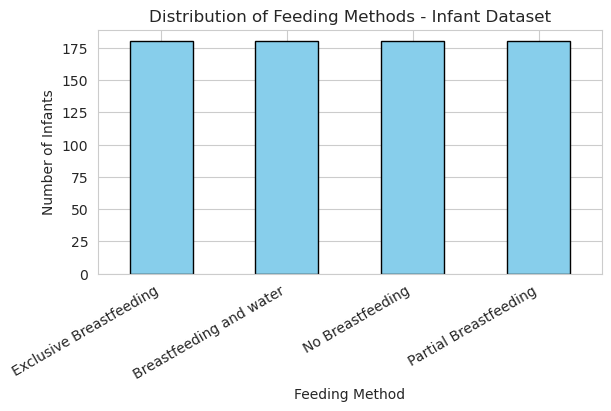

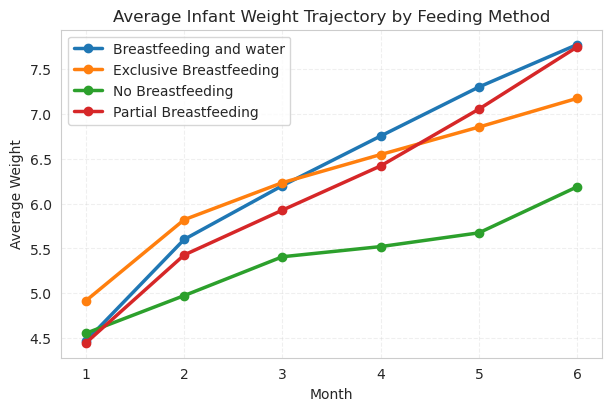

In [68]:
# Infant dataset: bar + line (time series by month)

# -------------------------------------------------
# Bar chart of feeding methods
# -------------------------------------------------
plt.figure(figsize=(6, 4))
infant_df["Breastfeeding Partern"].value_counts().plot(
    kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribution of Feeding Methods - Infant Dataset")
plt.xlabel("Feeding Method")
plt.ylabel("Number of Infants")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig("infant_feeding_bar.png", dpi=150)
plt.show()

# -------------------------------------------------
# Weight trajectory by month and feeding method
# -------------------------------------------------
infant_df["Month_num"] = infant_df["Month"].str.extract(r"(\d+)").astype(int)
avg_weight = (
    infant_df.groupby(["Month_num", "Breastfeeding Partern"])["Weight"]
    .mean()
    .reset_index())

plt.figure(figsize=(6, 4))
for method, group in avg_weight.groupby("Breastfeeding Partern"):
    plt.plot(group["Month_num"], group["Weight"],
             marker="o", linewidth=2.5, label=method)
plt.title("Average Infant Weight Trajectory by Feeding Method")
plt.xlabel("Month")
plt.ylabel("Average Weight")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.savefig("infant_weight_trajectory.png", dpi=150)
plt.show()

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

monkeypox_df = mpox_df.copy()

monkeypox_df = monkeypox_df.rename(columns={
    "Country(ies) in which research is/will be conducted": "Country",
    "Anticipated Completion": "Completion"})

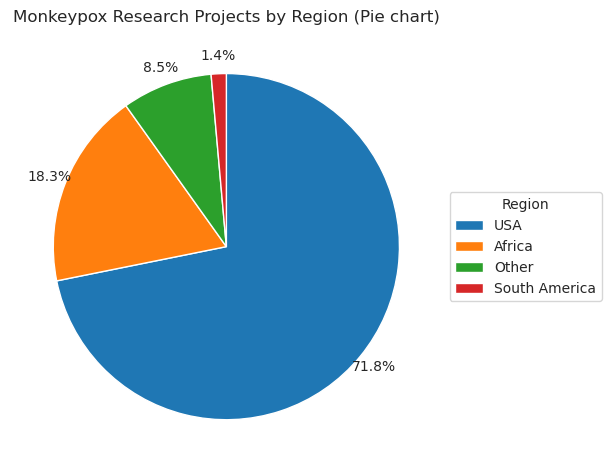

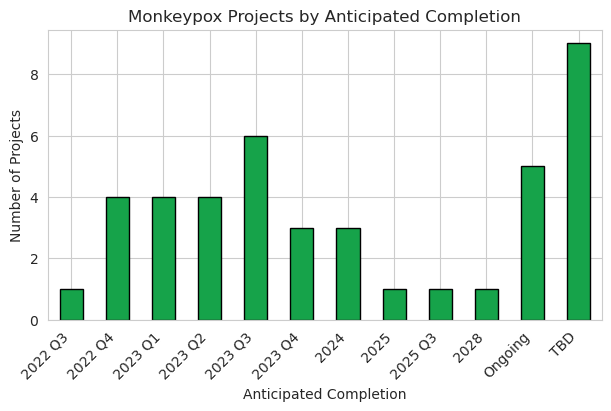

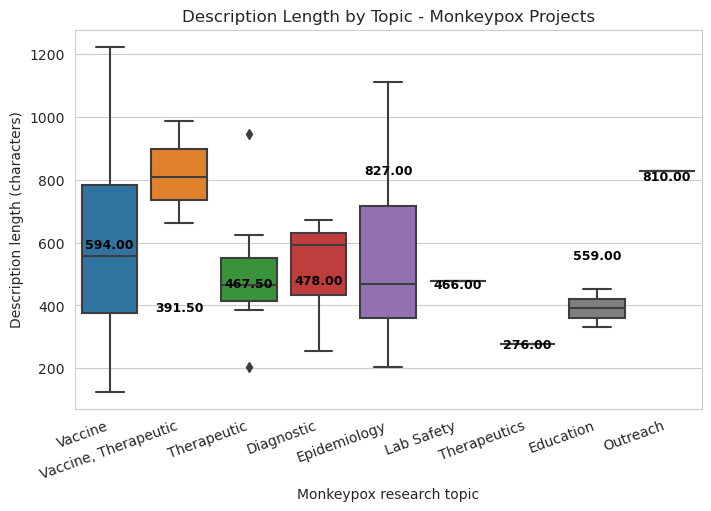

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

monkeypox_df = monkeypox_df.rename(columns={
    "Country(ies) in which research is/will be conducted": "Country",
    "Anticipated Completion": "Completion"})

country_map = {"Domestic    ": "Domestic", "Domestic": "Domestic",
               "USA    ": "USA", "USA": "USA",
               "Global    ": "Global", "Global": "Global"}
monkeypox_df["Country"] = monkeypox_df["Country"].replace(country_map)

def to_region(country):
    if isinstance(country, str):
        c = country.lower()
        if "united states" in c or "usa" in c or "domestic" in c:
            return "USA"
        if "canada" in c:
            return "Canada"
        if any(x in c for x in ["brazil", "peru", "mexico", "argentina", "panama"]):
            return "South America"
        if any(x in c for x in ["nigeria", "congo", "cameroon", "gabon", "africa"]):
            return "Africa"
        if any(x in c for x in ["germany", "france", "italy", "uk ", "europe"]):
            return "Europe"
        if any(x in c for x in ["india", "thailand", "vietnam", "asia"]):
            return "Asia"
        if any(x in c for x in ["australia", "new zealand"]):
            return "Australia"
    return "Other"

monkeypox_df["Region"] = monkeypox_df["Country"].apply(to_region)

# -------------------------------------------------
# 1) Pie chart: Monkeypox Research Projects by Region
# -------------------------------------------------

region_counts = monkeypox_df["Region"].value_counts()

plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(region_counts, labels=None, startangle=90, counterclock=False)
total = region_counts.sum()
for w, value in zip(wedges, region_counts):
    angle = (w.theta2 + w.theta1) / 2.0
    x = 1.1 * np.cos(np.deg2rad(angle))   
    y = 1.1 * np.sin(np.deg2rad(angle))
    pct = 100 * value / total
    plt.text(x, y, f"{pct:.1f}%", ha="center", va="center")

plt.legend(wedges, region_counts.index, title="Region", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Monkeypox Research Projects by Region (Pie chart)")
plt.show()


# -------------------------------------------------
# 2) Bar: Monkeypox Projects by Anticipated Completion
# -------------------------------------------------
comp_counts = monkeypox_df["Completion"].value_counts()
comp_counts = comp_counts[comp_counts.index.str.len() <= 15]

plt.figure(figsize=(6, 4))
comp_counts.sort_index().plot(kind="bar", color="#16a34a", edgecolor="black")

plt.title("Monkeypox Projects by Anticipated Completion")
plt.xlabel("Anticipated Completion")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45, ha="right")
plt.show()


# -------------------------------------------------
# 3) Boxplot: description length by Topic + medians
# -------------------------------------------------
monkeypox_df["Desc_len"] = monkeypox_df["Brief Description"].str.len()

plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=monkeypox_df, x="Topic", y="Desc_len")

medians = monkeypox_df.groupby("Topic")["Desc_len"].median()
for i, (group, median) in enumerate(medians.items()):
    ax.text(i, median, f"{median:.2f}", ha="center", va="center", fontsize=9, color="black", fontweight="bold")

plt.title("Description Length by Topic - Monkeypox Projects")
plt.xlabel("Monkeypox research topic")
plt.ylabel("Description length (characters)")
plt.xticks(rotation=20, ha="right")
plt.savefig("monkeypox_desclen_box.png", dpi=150, bbox_inches="tight")
plt.show()